In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Filtering out Warnings from output
import warnings
warnings.simplefilter("ignore")

In [ ]:
# Loading Data
df = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468269,72.528589,71.223267,71.476607,135480400
2020-01-03,71.763718,72.523746,71.539330,71.696160,146322800
2020-01-06,72.335564,72.374169,70.634547,70.885479,118387200
2020-01-07,71.995369,72.600975,71.775804,72.345220,108872000
2020-01-08,73.153511,73.455110,71.698596,71.698596,132079200


In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,138.087082,139.569525,136.456247,137.956920,9.895373e+07
std,33.389043,33.509248,33.249770,33.382772,5.439610e+07
min,54.264324,55.263174,51.420146,55.161597,2.404830e+07
25%,120.509686,121.751831,118.975330,120.615305,6.407675e+07
50%,142.950012,144.525347,141.286906,142.799643,8.467540e+07
75%,163.347748,165.625931,162.092960,163.615783,1.155069e+08
max,196.256577,197.752444,195.156959,196.167422,4.265100e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1006 non-null   float64
 1   (High, AAPL)    1006 non-null   float64
 2   (Low, AAPL)     1006 non-null   float64
 3   (Open, AAPL)    1006 non-null   float64
 4   (Volume, AAPL)  1006 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 47.2 KB


In [ ]:
df.shape

(1006, 5)

# Data Preprocessing

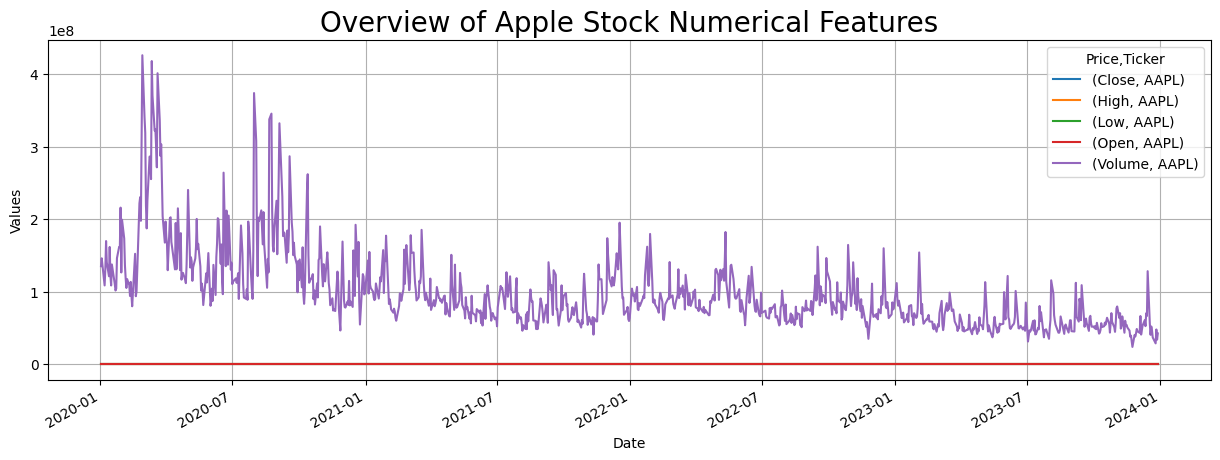

In [ ]:
# Ploting all numerical features together
df.plot(figsize=(15, 5))
plt.title("Overview of Apple Stock Numerical Features", fontsize=20)
plt.xlabel("Date")
plt.ylabel("Values")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Open and Close prices for Apple')

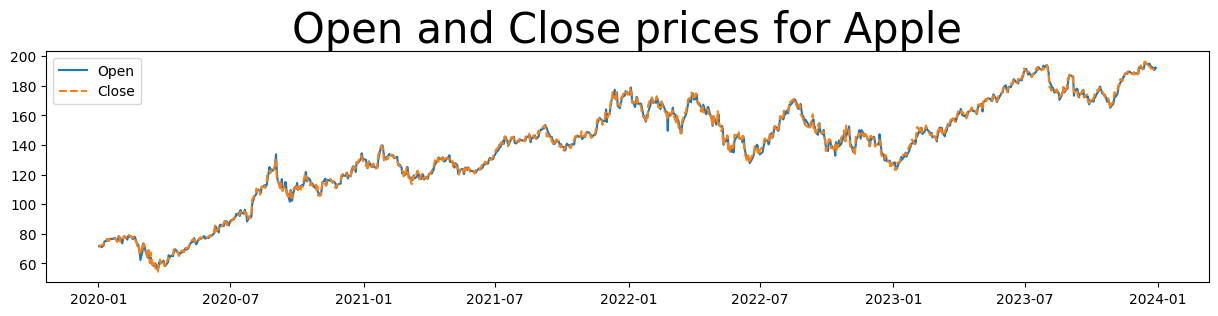

In [ ]:
# Open vs Close Price Comparison
plt.figure(figsize =(15,3))
plt.plot(df['Open'])
plt.plot(df['Close'],linestyle='--')
plt.legend(['Open','Close'])
plt.title('Open and Close prices for Apple', fontsize = 30)

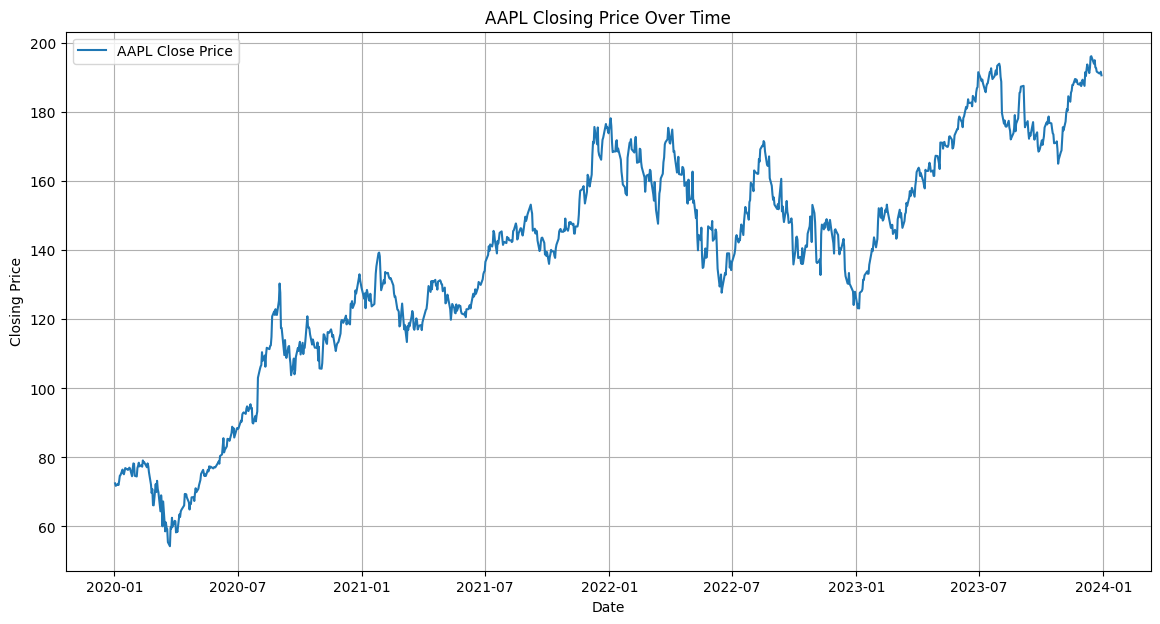

In [ ]:
# Plotting the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='AAPL Close Price')
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()

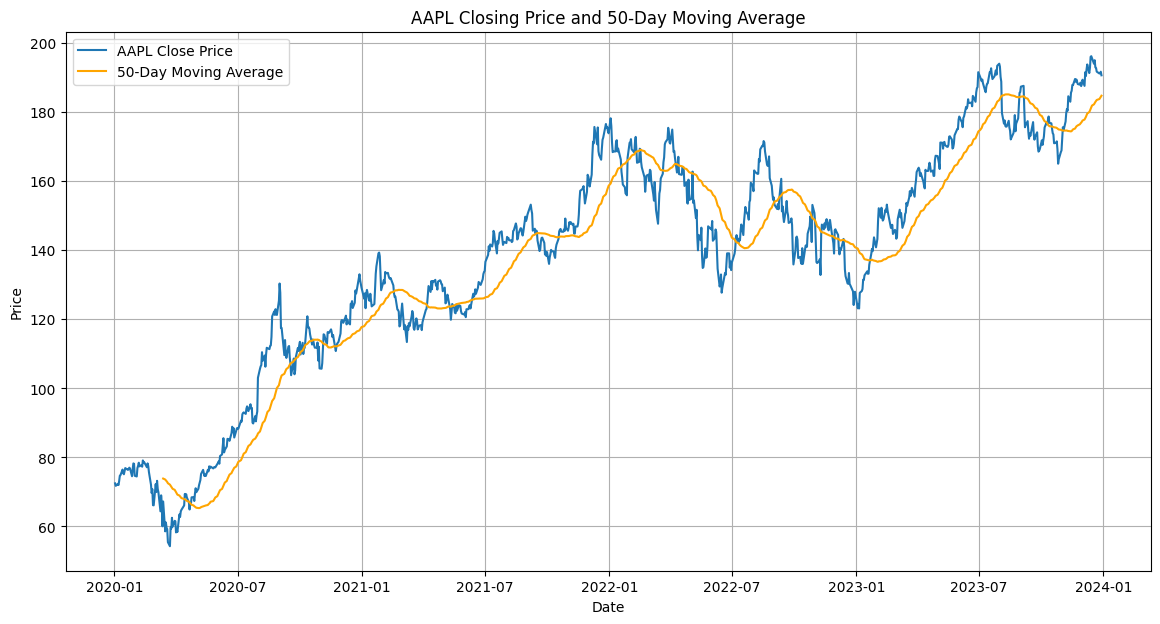

In [ ]:
# Calculating and plotting the moving average (50-day)
df['50-day MA'] = df['Close'].rolling(window=50).mean()
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='AAPL Close Price')
plt.plot(df['50-day MA'], label='50-Day Moving Average', color='orange')
plt.title('AAPL Closing Price and 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

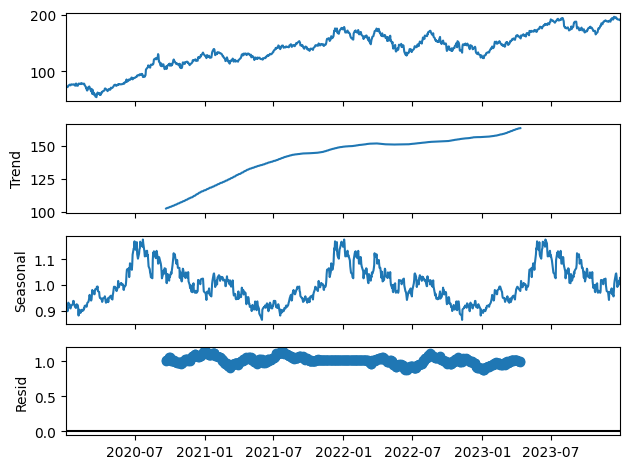

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal Decomposition
result = seasonal_decompose(df['Close'], model='multiplicative', period=365)
result.plot()
plt.show()

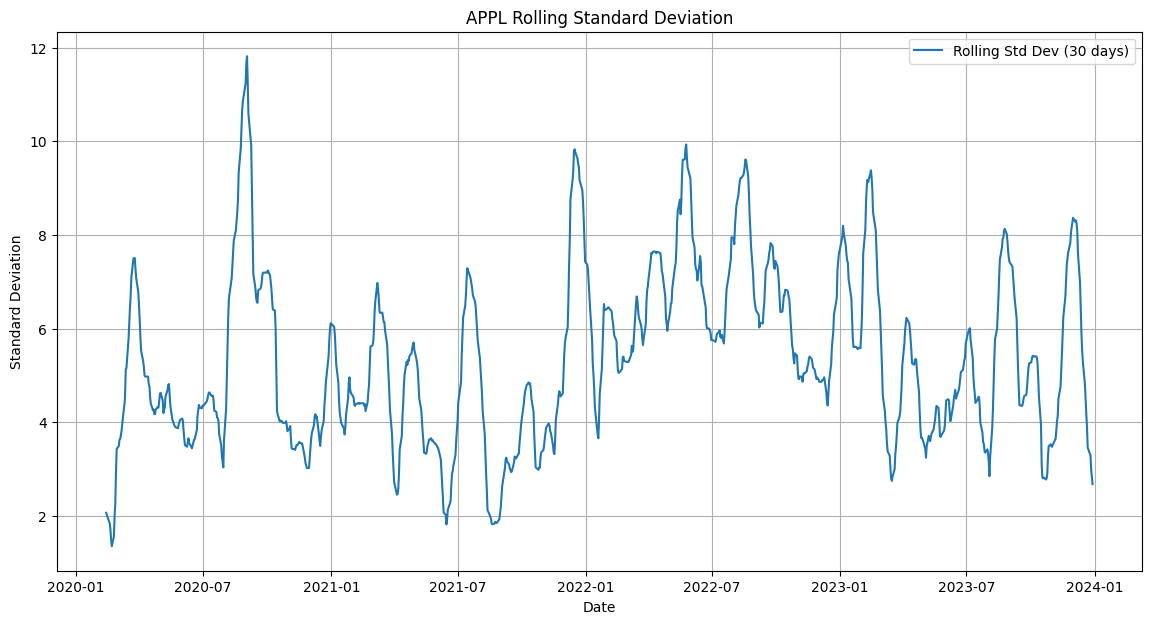

In [ ]:
# Calculating rolling standard deviation
df['Rolling Std Dev'] = df['Close'].rolling(window=30).std()

plt.figure(figsize=(14, 7))
plt.plot(df['Rolling Std Dev'], label='Rolling Std Dev (30 days)')
plt.title('APPL Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid()
plt.show()

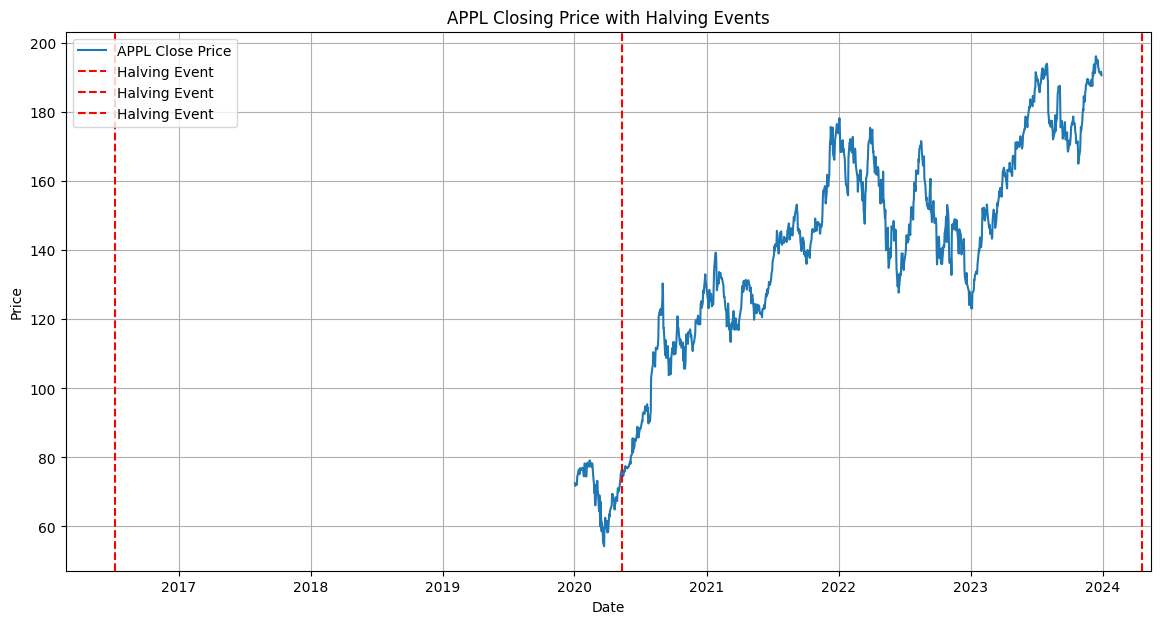

In [ ]:
# Apple Closing Price with Halving Event
halving_dates = ['2016-07-09', '2020-05-11', '2024-04-19']

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='APPL Close Price')
for date in halving_dates:
    plt.axvline(pd.to_datetime(date), color='r', linestyle='--', label='Halving Event')
plt.title('APPL Closing Price with Halving Events')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

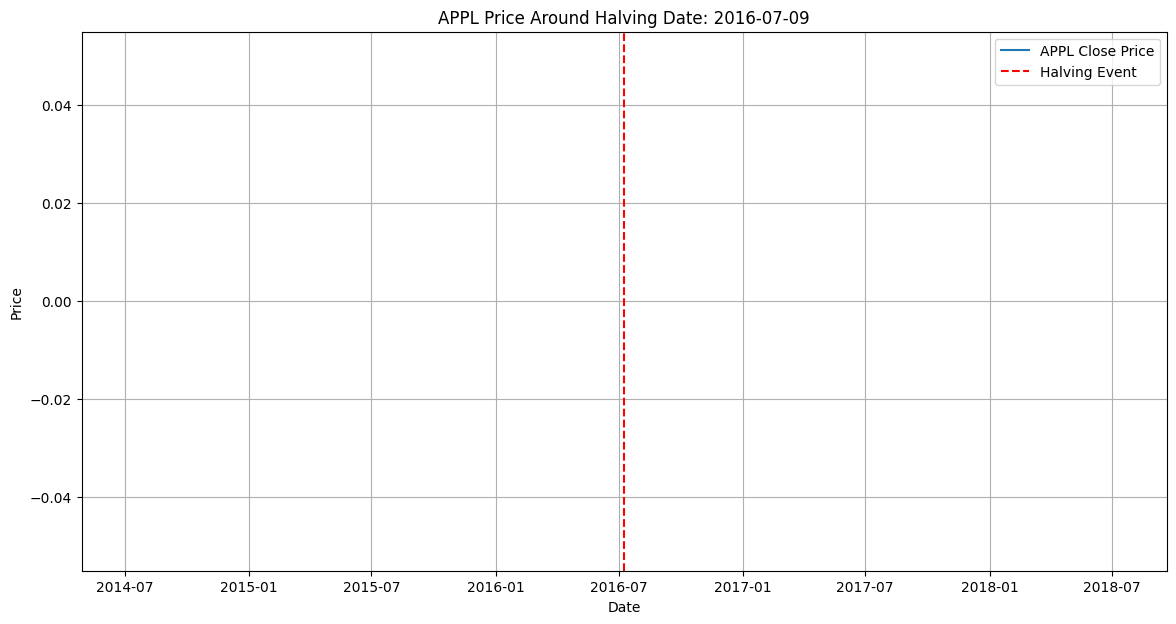

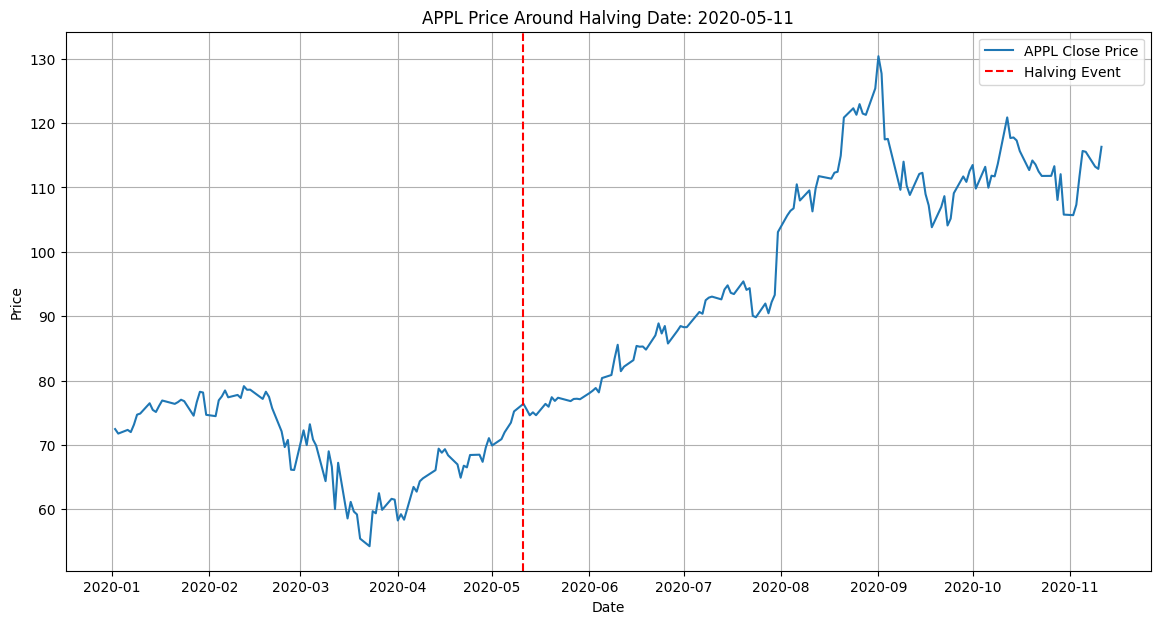

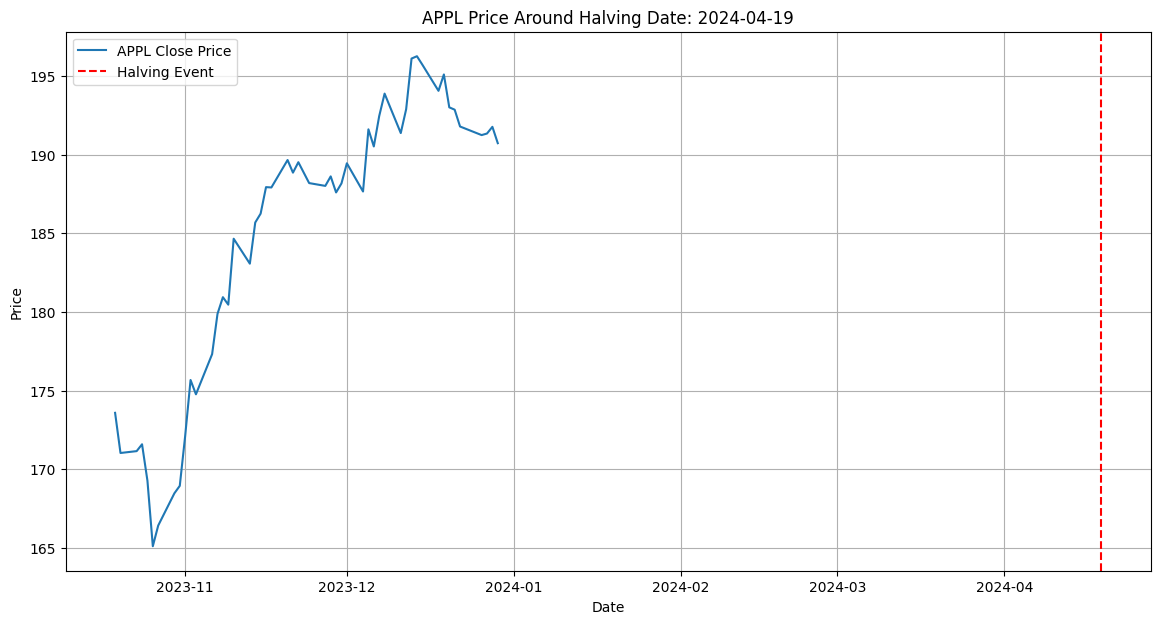

In [ ]:
# Apple Price Around Halving Date
for halving_date in halving_dates:
    halving_date = pd.to_datetime(halving_date)
    start_date = halving_date - pd.DateOffset(months=6)
    end_date = halving_date + pd.DateOffset(months=6)
    halving_period = df.loc[start_date:end_date]

    plt.figure(figsize=(14, 7))
    plt.plot(halving_period['Close'], label='APPL Close Price')
    plt.axvline(halving_date, color='r', linestyle='--', label='Halving Event')
    plt.title(f'APPL Price Around Halving Date: {halving_date.date()}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
# Correlation matrix
correlation_matrix = df[['Close', 'Volume']].corr()
correlation_matrix

,Price,Close,Volume
,Ticker,AAPL,AAPL
Price,Ticker,,
Close,AAPL,1.000000,-0.648123
Volume,AAPL,-0.648123,1.000000


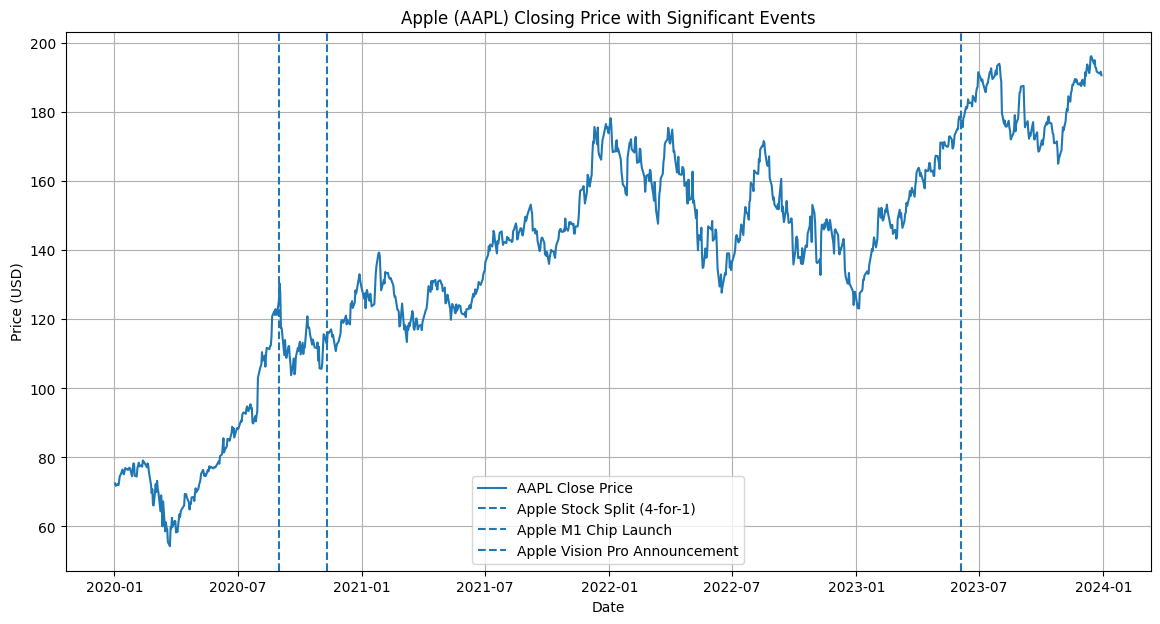

In [ ]:
events = {
    'Apple Stock Split (4-for-1)': '2020-08-31',
    'Apple M1 Chip Launch': '2020-11-10',
    'Apple Vision Pro Announcement': '2023-06-05'
}

# Plotting events on the closing price chart
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='AAPL Close Price')

for event, date in events.items():
    plt.axvline(pd.to_datetime(date), linestyle='--', label=event)

plt.title('Apple (AAPL) Closing Price with Significant Events')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

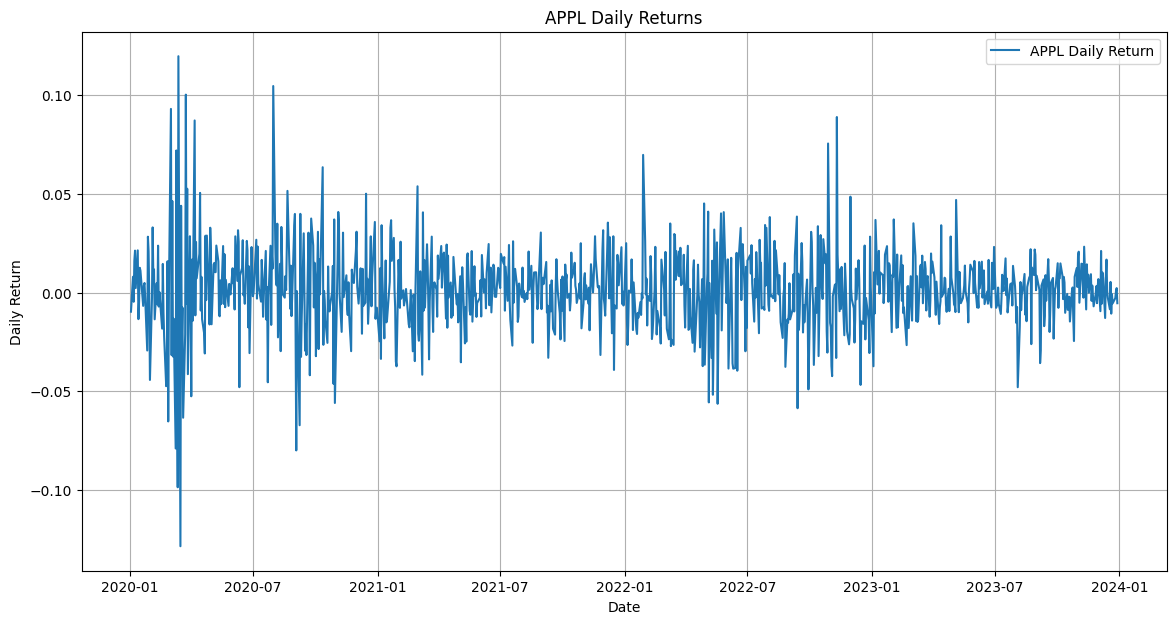

count    1005.000000
mean        0.001187
std         0.021146
min        -0.128647
25%        -0.009128
50%         0.000988
75%         0.012743
max         0.119808
Name: Daily Return, dtype: float64


In [ ]:
df['Daily Return'] = df['Close'].pct_change()

# Plotting daily returns
plt.figure(figsize=(14, 7))
plt.plot(df['Daily Return'], label='APPL Daily Return')
plt.title('APPL Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid()
plt.show()

# Summary statistics
print(df['Daily Return'].describe())

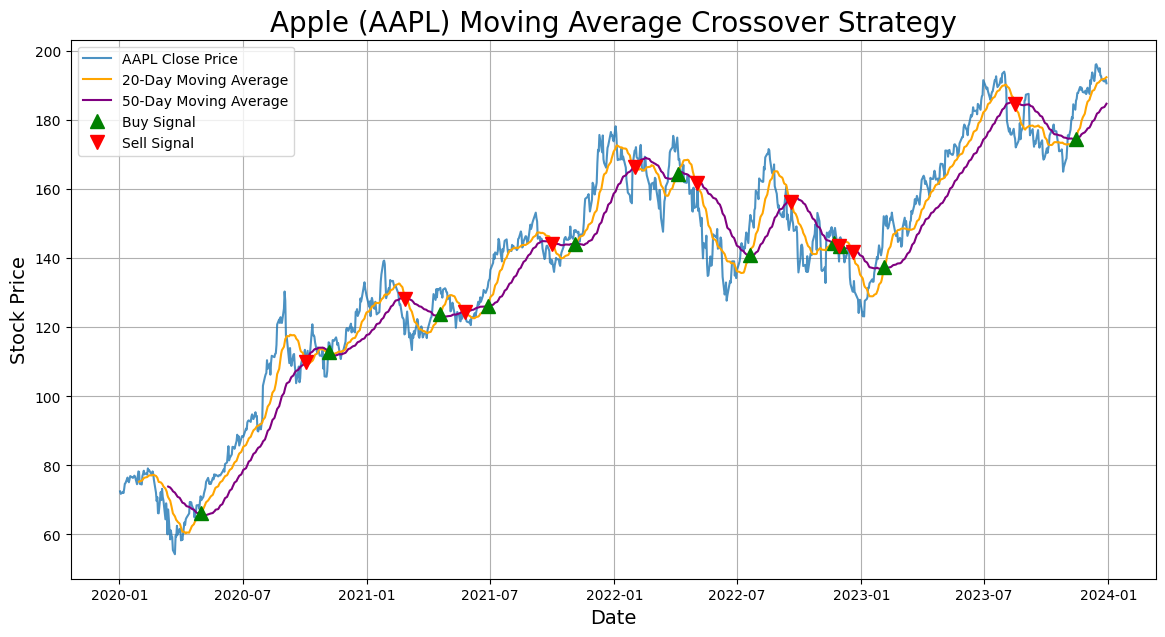

In [ ]:
df.reset_index(inplace=True)

# Moving Averages Calculation
df['Short_MA'] = df['Close'].rolling(window=20).mean()
df['Long_MA'] = df['Close'].rolling(window=50).mean()

# Trading Signal Generation
df['Signal'] = 0.0
df.loc[20:, 'Signal'] = np.where(
    df['Short_MA'].iloc[20:] > df['Long_MA'].iloc[20:],
    1.0,
    0.0
)

df['Position'] = df['Signal'].diff()

# Moving Average Crossover Strategy
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='AAPL Close Price', alpha=0.8)
plt.plot(df['Date'], df['Short_MA'], label='20-Day Moving Average', color='orange')
plt.plot(df['Date'], df['Long_MA'], label='50-Day Moving Average', color='purple')

# Ploting Buy signals
plt.plot(
    df[df['Position'] == 1]['Date'],
    df[df['Position'] == 1]['Short_MA'],
    '^',
    markersize=10,
    color='green',
    label='Buy Signal'
)

# Ploting Sell signals
plt.plot(
    df[df['Position'] == -1]['Date'],
    df[df['Position'] == -1]['Short_MA'],
    'v',
    markersize=10,
    color='red',
    label='Sell Signal'
)

# Ploting formatting
plt.title('Apple (AAPL) Moving Average Crossover Strategy', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

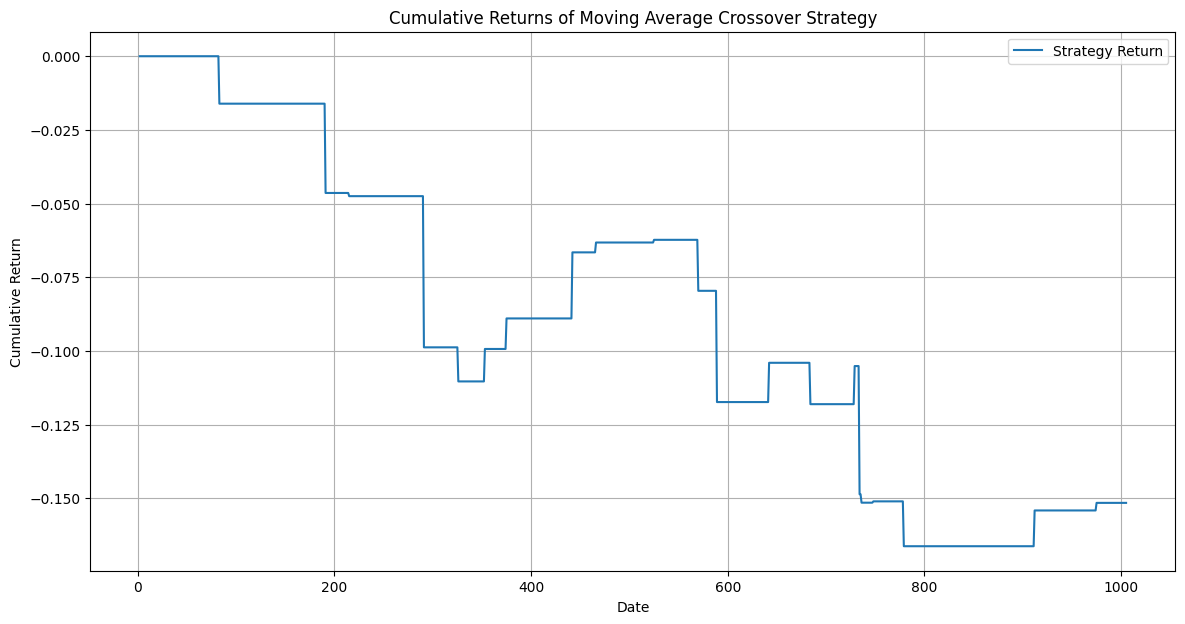

In [ ]:
# Calculating strategy returns
df['Strategy Return'] = df['Daily Return'] * df['Position'].shift(1)
cumulative_strategy_returns = (1 + df['Strategy Return']).cumprod() - 1

# Plotting cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(cumulative_strategy_returns, label='Strategy Return')
plt.title('Cumulative Returns of Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()